In [3]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

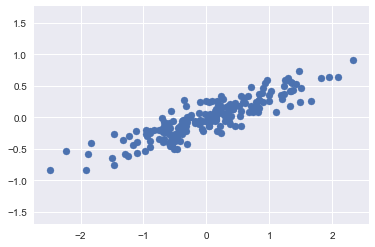

In [6]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal');

In [7]:
from sklearn.decomposition import PCA

In [9]:
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [11]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [13]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


In [15]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops = dict(arrowstyle='->',
                     linewidth=2,
                     shrinkA=0,
                     shrinkB=0)
    ax.annotate('',v1,v0,arrowprops=arrowprops)

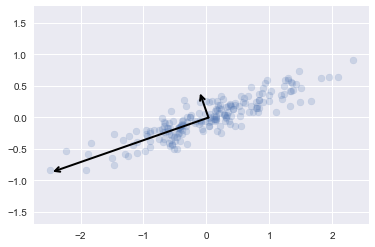

In [20]:
plt.scatter(X[:,0], X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_,
                         pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [22]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape:', X.shape)
print('transformed shape:', X_pca.shape)

original shape: (200, 2)
transformed shape: (200, 1)


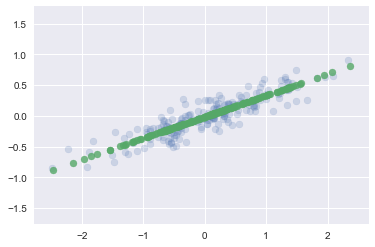

In [24]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal');